# **Imports**

In [ ]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.1 MB/s eta 0:00:00


In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json
from collections import Counter
import datetime
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.lib.enums import TA_CENTER

# **Data Exploration**

In [ ]:
import pandas as pd
import json
from google.colab import drive
import os

# --- Mount Google Drive ---
drive.mount('/content/drive')
drive_path = '/content/drive/My Drive/VQA_Data/'

# --- 1. Load and Explore Question Files ---
print("\n" + "#"*60)
print(" Part 1: Exploring Question Files from Google Drive")
print("#"*60)

# Update file names with the full path from Google Drive
question_files = {
    'train2014': f'{drive_path}v2_OpenEnded_mscoco_train2014_questions.json',
    'val2014': f'{drive_path}v2_OpenEnded_mscoco_val2014_questions.json',
    'test2015': f'{drive_path}v2_OpenEnded_mscoco_test2015_questions.json',
    'test-dev2015': f'{drive_path}v2_OpenEnded_mscoco_test-dev2015_questions.json'
}

all_questions_dfs = []
for dataset_name, fname in question_files.items():
    try:
        with open(fname, 'r') as f:
            # The JSON structure contains a 'questions' key
            data = json.load(f)
            df = pd.DataFrame(data['questions'])
            # Add a 'dataset' column to identify the source
            df['dataset'] = dataset_name
            all_questions_dfs.append(df)
    except FileNotFoundError:
        print(f"Warning: File not found: {fname}. Skipping.")
        continue
    except Exception as e:
        print(f"An error occurred while loading {fname}: {e}")

if not all_questions_dfs:
    print("\nError: No question data loaded. Halting exploration of question files.")
else:
    all_questions_df = pd.concat(all_questions_dfs, ignore_index=True)
    print(f"\nSuccessfully loaded and combined {len(all_questions_df)} questions.")

    print("\n\nSample of the combined data:")
    print(all_questions_df.head().to_string())

    # --- Using .info() for a Technical Summary ---
    print("\n" + "="*50)
    print(" Technical Summary of All Questions")
    print("="*50)
    all_questions_df.info()

    # --- Using .describe() for Statistical Summaries ---
    print("\n" + "="*50)
    print(" Descriptive Statistics for Numerical Columns (All Questions)")
    print("="*50)
    print(all_questions_df.describe())

    print("\n" + "="*50)
    print(" Descriptive Statistics for Text Columns (All Questions)")
    print("="*50)
    print(all_questions_df.describe(include=['object']))


# --- 2. Load and Explore Complementary Pairs Files ---
print("\n\n" + "#"*60)
print(" Part 2: Exploring Complementary Pairs Files from Google Drive")
print("#"*60)

# Update file names with the full path from Google Drive
complementary_pair_files = [
    f'{drive_path}v2_mscoco_train2014_complementary_pairs.json',
    f'{drive_path}v2_mscoco_val2014_complementary_pairs.json'
]

all_pairs_dfs = []
for fname in complementary_pair_files:
    try:
        with open(fname, 'r') as f:
            # This data is a list of lists, not a JSON object with a key
            pairs_list = json.load(f)
            df = pd.DataFrame(pairs_list, columns=['question_id_1', 'question_id_2'])
            all_pairs_dfs.append(df)
    except FileNotFoundError:
        print(f"Warning: File not found: {fname}. Skipping.")
        continue
    except Exception as e:
        print(f"An error occurred loading {fname}: {e}")

if not all_pairs_dfs:
    print("\nError: No complementary pairs data loaded.")
else:
    all_pairs_df = pd.concat(all_pairs_dfs, ignore_index=True)
    print(f"\nSuccessfully loaded and combined {len(all_pairs_df)} complementary pairs.")

    # --- Using .info() for a Technical Summary ---
    print("\n" + "="*50)
    print(" Technical Summary of Complementary Pairs")
    print("="*50)
    all_pairs_df.info()

    # --- Using .describe() for Statistical Summaries ---
    print("\n" + "="*50)
    print(" Descriptive Statistics for Numerical Columns (Complementary Pairs)")
    print("="*50)
    print(all_pairs_df.describe())

Mounted at /content/drive

############################################################
 Part 1: Exploring Question Files from Google Drive
############################################################

Successfully loaded and combined 1213298 questions.


Sample of the combined data:
   image_id                                     question  question_id    dataset
0    458752    What is this photo taken looking through?    458752000  train2014
1    458752           What position is this man playing?    458752001  train2014
2    458752             What color is the players shirt?    458752002  train2014
3    458752  Is this man a professional baseball player?    458752003  train2014
4    262146                      What color is the snow?    262146000  train2014

 Technical Summary of All Questions
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213298 entries, 0 to 1213297
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    -

# **Task 1: VQA System Performance Dashboard**

**Query Volume**


VQA System Performance Dashboard

Metric: Query Volume

Total Query Volume (All Datasets): 1213298

Query Volume by Dataset Split:
dataset
test2015        447793
train2014       443757
val2014         214354
test-dev2015    107394

Generating visualization of query volume by dataset...


/tmp/ipython-input-4-2880600185.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_by_dataset.index, y=volume_by_dataset.values, palette='mako')


Saved chart as 'query_volume_by_dataset.png'


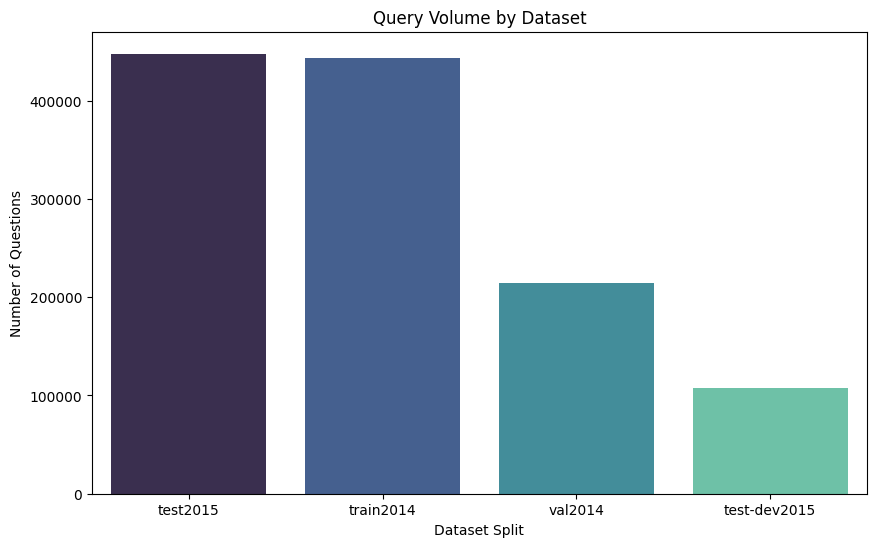

In [ ]:
print("\nVQA System Performance Dashboard")
print("\nMetric: Query Volume")
total_query_volume = len(all_questions_df)
# Corrected to use the 'dataset' column which is now added during loading
volume_by_dataset = all_questions_df['dataset'].value_counts()

print(f"\nTotal Query Volume (All Datasets): {total_query_volume}")
print("\nQuery Volume by Dataset Split:")
print(volume_by_dataset.to_string())

print("\nGenerating visualization of query volume by dataset...")
plt.figure(figsize=(10, 6))
sns.barplot(x=volume_by_dataset.index, y=volume_by_dataset.values, palette='mako')
plt.title('Query Volume by Dataset')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Questions')
plt.savefig('query_volume_by_dataset.png')
print("Saved chart as 'query_volume_by_dataset.png'")
plt.show()

**Response Accuracy**

In [ ]:
print("--- Calculating Response Accuracy (Weighted Score Method) ---")

questions_file_name = f'{drive_path}v2_OpenEnded_mscoco_val2014_questions.json'
annotations_file_name = f'{drive_path}v2_mscoco_val2014_annotations.json'

try:
    with open(questions_file_name, 'r') as f:
        questions_data = json.load(f)
        questions_df = pd.DataFrame(questions_data['questions'])
    print(f"Successfully loaded {questions_file_name}")

    with open(annotations_file_name, 'r') as f:
        annotations_data = json.load(f)
        annotations_df = pd.DataFrame(annotations_data['annotations'])
    print(f"Successfully loaded {annotations_file_name}")

except FileNotFoundError as e:
    print(f"\nError: {e}. Please make sure the required files are in the correct Google Drive directory.")


# Check if DataFrames were loaded successfully before proceeding
if 'questions_df' in locals() and 'annotations_df' in locals():

    def calculate_weighted_answerability(answer_list):
        """
        Calculates a weighted score based on the confidence of human annotators.
        Score mapping: 'yes' = 1.0, 'maybe' = 0.5, 'no' = 0.0
        """
        score = 0.0
        confidence_weights = {'yes': 1.0, 'maybe': 0.5, 'no': 0.0}

        for ans in answer_list:
            confidence = ans.get('answer_confidence', 'no').lower()
            score += confidence_weights.get(confidence, 0.0)  # Defaults to 0 if confidence value is unexpected

        # Return the average score for the question
        if not answer_list:
            return 0
        return score / len(answer_list)

    # Apply the function to the 'answers' column
    annotations_df['answerability_score'] = annotations_df['answers'].apply(calculate_weighted_answerability)

    # --- Calculate Overall Response Accuracy for the Dashboard ---
    overall_response_accuracy = annotations_df['answerability_score'].mean() * 100

    print("\n--- VQA Dashboard Metric (Weighted) ---")
    print(f"Overall Response Accuracy (based on Weighted Answerability): {overall_response_accuracy:.2f}%")
    print("This score reflects the average confidence across all answers, with 'yes'=1, 'maybe'=0.5, and 'no'=0.")


    # --- Display Example Questions ---
    qa_df = pd.merge(annotations_df, questions_df, on='question_id')

    def get_majority_answer(answer_list):
        """Finds the most frequent answer from a list of answer objects."""
        answers = [ans['answer'] for ans in answer_list]
        if not answers:
            return "N/A"
        return max(set(answers), key=answers.count)

    qa_df['majority_answer'] = qa_df['answers'].apply(get_majority_answer)

    print("\n--- Sample Questions (Ranked by Weighted Score) ---")

    print("\nTop 5 Most Answerable Questions (Highest Weighted Score):")
    high_confidence_df = qa_df.sort_values(by='answerability_score', ascending=False).head(5)
    print(high_confidence_df[['question', 'majority_answer', 'answerability_score']].to_string(index=False))

    print("\n\nTop 5 Least Answerable Questions (Lowest Weighted Score):")
    low_confidence_df = qa_df.sort_values(by='answerability_score', ascending=True).head(5)
    print(low_confidence_df[['question', 'majority_answer', 'answerability_score']].to_string(index=False))

else:
    print("\nCould not proceed with calculations because one or more data files failed to load.")

--- Calculating Response Accuracy (Weighted Score Method) ---
Successfully loaded /content/drive/My Drive/VQA_Data/v2_OpenEnded_mscoco_val2014_questions.json
Successfully loaded /content/drive/My Drive/VQA_Data/v2_mscoco_val2014_annotations.json

--- VQA Dashboard Metric (Weighted) ---
Overall Response Accuracy (based on Weighted Answerability): 89.26%
This score reflects the average confidence across all answers, with 'yes'=1, 'maybe'=0.5, and 'no'=0.

--- Sample Questions (Ranked by Weighted Score) ---

Top 5 Most Answerable Questions (Highest Weighted Score):
                           question majority_answer  answerability_score
Does the arrow point left or right?            left                  1.0
                 What room is this?        bathroom                  1.0
               Are the windows big?             yes                  1.0
         Are these twin mattresses?              no                  1.0
                     How many beds?               1               

# **Task 2:**

**Product attributes and features of interest**

Loading all question files from Google Drive...
 -> Successfully loaded v2_OpenEnded_mscoco_train2014_questions.json
 -> Successfully loaded v2_OpenEnded_mscoco_val2014_questions.json
 -> Successfully loaded v2_OpenEnded_mscoco_test2015_questions.json
 -> Successfully loaded v2_OpenEnded_mscoco_test-dev2015_questions.json

Successfully loaded and combined a total of 1213298 questions.

Categorizing questions based on keywords...

--- Most Common Product Attributes Mentioned in Questions ---
Color                152026
Brand & Logo          20182
Size & Shape          15387
Material               8769
Texture & Pattern      3992


/tmp/ipython-input-6-3851610395.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attribute_counts_series.index, y=attribute_counts_series.values, palette='viridis')



Saved visualization of common product attributes to your Google Drive at: /content/drive/My Drive/VQA_Data/common_product_attributes.png


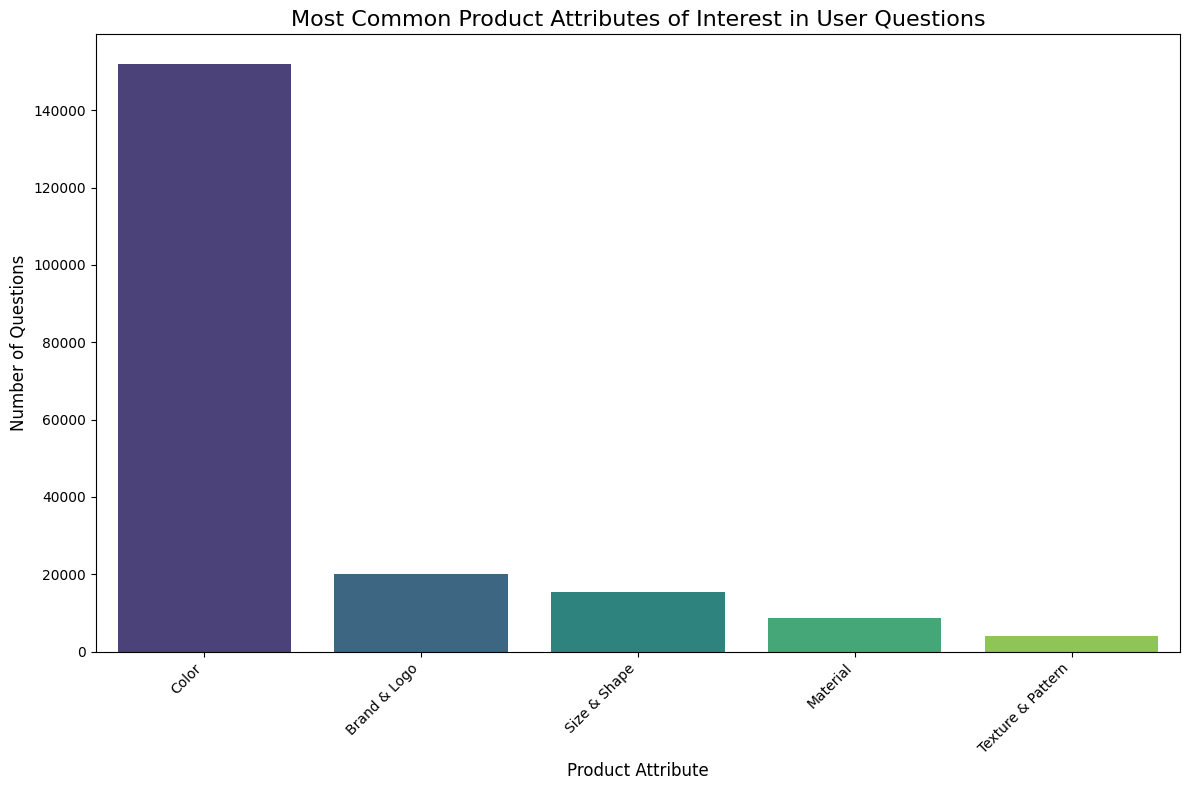

In [ ]:
# --- 1. Load All Question Files from Google Drive ---
file_names = [
    f'{drive_path}v2_OpenEnded_mscoco_train2014_questions.json',
    f'{drive_path}v2_OpenEnded_mscoco_val2014_questions.json',
    f'{drive_path}v2_OpenEnded_mscoco_test2015_questions.json',
    f'{drive_path}v2_OpenEnded_mscoco_test-dev2015_questions.json'
]
all_questions_dfs = []

print("Loading all question files from Google Drive...")
for fname in file_names:
    try:
        with open(fname, 'r') as f:
            data = json.load(f)
            df = pd.DataFrame(data['questions'])
            all_questions_dfs.append(df)
            print(f" -> Successfully loaded {fname.split('/')[-1]}")
    except FileNotFoundError:
        print(f"Warning: File not found: {fname}. Skipping.")
        continue
    except Exception as e:
        print(f"An error occurred while loading {fname}: {e}")

if not all_questions_dfs:
    print("\nError: No question data loaded. Halting execution.")
    exit()

all_questions_df = pd.concat(all_questions_dfs, ignore_index=True)
print(f"\nSuccessfully loaded and combined a total of {len(all_questions_df)} questions.")


# --- 2. Define E-commerce Attribute Keywords & Categorize ---
attribute_keywords = {
    'Color': ['color', 'black', 'white', 'red', 'blue', 'green', 'yellow', 'brown', 'orange', 'purple', 'pink', 'gray', 'silver', 'gold'],
    'Material': ['material', 'made of', 'wood', 'wooden', 'metal', 'metallic', 'plastic', 'glass', 'leather', 'cotton', 'fabric', 'ceramic', 'stone'],
    'Size & Shape': ['size', 'shape', 'big', 'large', 'small', 'tiny', 'long', 'short', 'tall', 'wide', 'round', 'square', 'rectangular', 'circular', 'how big', 'how large', 'how tall'],
    'Texture & Pattern': ['texture', 'pattern', 'striped', 'dotted', 'plaid', 'checkered', 'smooth', 'rough', 'shiny', 'matte', 'blurry'],
    'Brand & Logo': ['brand', 'logo', 'make', 'company', 'sign', 'symbol']
}

print("\nCategorizing questions based on keywords...")

# Create a copy to avoid SettingWithCopyWarning
categorized_df = all_questions_df.copy()

def find_category(question_text, keywords):
    """Checks for the presence of any keyword for a given category."""
    # Add spaces to ensure whole-word matching
    padded_question = f' {question_text.lower()} '
    for keyword in keywords:
        if f' {keyword} ' in padded_question:
            return True
    return False

# Apply the function for each attribute category
for category, keywords in attribute_keywords.items():
    categorized_df[category] = categorized_df['question'].apply(lambda q: find_category(q, keywords))

# Calculate the count for each category
attribute_counts = {category: categorized_df[category].sum() for category in attribute_keywords}

# Convert to a pandas Series for easy sorting and plotting
attribute_counts_series = pd.Series(attribute_counts).sort_values(ascending=False)

print("\n--- Most Common Product Attributes Mentioned in Questions ---")
print(attribute_counts_series.to_string())


# --- 3. Visualize the Findings ---
plt.figure(figsize=(12, 8))
sns.barplot(x=attribute_counts_series.index, y=attribute_counts_series.values, palette='viridis')
plt.title('Most Common Product Attributes of Interest in User Questions', fontsize=16)
plt.xlabel('Product Attribute', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to make room for rotated labels

# Save the figure to your Google Drive
output_image_path = f'{drive_path}common_product_attributes.png'
plt.savefig(output_image_path)
print(f"\nSaved visualization of common product attributes to your Google Drive at: {output_image_path}")
plt.show()

# **Task 3: Identify "Unanswered" or "Poorly Answered" Questions**

In [ ]:
# --- Load Files from Google Drive ---
print("Loading files from Google Drive...")
try:
    questions_file_path = f'{drive_path}v2_OpenEnded_mscoco_val2014_questions.json'
    annotations_file_path = f'{drive_path}v2_mscoco_val2014_annotations.json'

    with open(questions_file_path, 'r') as f:
        questions_df = pd.DataFrame(json.load(f)['questions'])
    print(f" -> Successfully loaded: {questions_file_path.split('/')[-1]}")

    with open(annotations_file_path, 'r') as f:
        annotations_df = pd.DataFrame(json.load(f)['annotations'])
    print(f" -> Successfully loaded: {annotations_file_path.split('/')[-1]}")

except FileNotFoundError as e:
    print(f"\nError: {e}. Please ensure the necessary files are in the correct Google Drive directory.")
    exit()

# --- 1. Define Calculation Functions ---

def calculate_agreement_score(answer_list):
    """Calculates agreement as the frequency of the most common answer."""
    if not answer_list: return 0
    answer_texts = [ans['answer'] for ans in answer_list]
    if not answer_texts: return 0
    # Use Counter to find the count of the most frequent answer
    most_common_count = Counter(answer_texts).most_common(1)[0][1]
    return most_common_count / len(answer_texts)

def calculate_confidence_score(answer_list):
    """Calculates a weighted average of answer confidence."""
    if not answer_list: return 0
    weights = {'yes': 1.0, 'maybe': 0.5, 'no': 0.0}
    total_score = sum(weights.get(ans.get('answer_confidence', 'no').lower(), 0.0) for ans in answer_list)
    return total_score / len(answer_list)

# --- 2. Calculate Scores for Each Question ---
print("\nCalculating agreement and confidence scores...")
annotations_df['agreement_score'] = annotations_df['answers'].apply(calculate_agreement_score)
annotations_df['confidence_score'] = annotations_df['answers'].apply(calculate_confidence_score)

# --- 3. Combine Scores into a Single "Difficulty Score" ---
# A higher score indicates a more difficult or "poorly answered" question.
# We weigh agreement more heavily as low agreement is a strong indicator of ambiguity.
annotations_df['difficulty_score'] = (0.6 * (1 - annotations_df['agreement_score'])) + (0.4 * (1 - annotations_df['confidence_score']))

# --- 4. Merge Data and Identify Weaknesses ---
print("Merging data and identifying top weaknesses...")
qa_df = pd.merge(annotations_df, questions_df, on='question_id')
poorly_answered_df = qa_df.sort_values(by='difficulty_score', ascending=False)

# --- 5. Display the Results ---
def format_answers(answer_list):
    """Creates a summary of unique answers and their counts for display."""
    answer_counts = Counter(ans['answer'] for ans in answer_list)
    # Shows up to 5 most common answers and their counts
    return ', '.join([f"'{ans}' ({count})" for ans, count in answer_counts.most_common(5)])

poorly_answered_df['answer_summary'] = poorly_answered_df['answers'].apply(format_answers)

print("\n--- Top 15 Most Difficult ('Poorly Answered') Questions ---")
display_cols = ['question', 'answer_summary', 'difficulty_score', 'agreement_score', 'confidence_score']
print(poorly_answered_df[display_cols].head(15).to_string())

Loading files from Google Drive...
 -> Successfully loaded: v2_OpenEnded_mscoco_val2014_questions.json
 -> Successfully loaded: v2_mscoco_val2014_annotations.json

Calculating agreement and confidence scores...
Merging data and identifying top weaknesses...

--- Top 15 Most Difficult ('Poorly Answered') Questions ---
                                                                        question                                                                           answer_summary  difficulty_score  agreement_score  confidence_score
39673                                              What city is this photo from?             'los angeles' (1), 'new jersey' (1), 'ny' (1), 'glasgow' (1), 'new york' (1)              0.94              0.1              0.00
73192                                       What does the cell phone screen say?         'unknown' (1), 'illegible' (1), 't mobile' (1), 'restricted' (1), 'language' (1)              0.92              0.1              0.05
51421       

# **Task 4:**

Loading all files from Google Drive...
 -> Successfully loaded: v2_OpenEnded_mscoco_train2014_questions.json
 -> Successfully loaded: v2_OpenEnded_mscoco_val2014_questions.json
 -> Successfully loaded: v2_OpenEnded_mscoco_test2015_questions.json
 -> Successfully loaded: v2_OpenEnded_mscoco_test-dev2015_questions.json

Successfully loaded and combined 1213298 questions.

--- Task: Generate Report for Merchandising Team (Focused on Variations) ---


 VQA SYSTEM: PRODUCT VARIATION INSIGHTS REPORT
**Date:** July 01, 2025
**Focus:** Analysis of specific product variations requested by customers.

### Most Requested Product Colors ###


/tmp/ipython-input-8-1446326885.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_requested_colors.index, y=most_requested_colors.values, palette='colorblind')


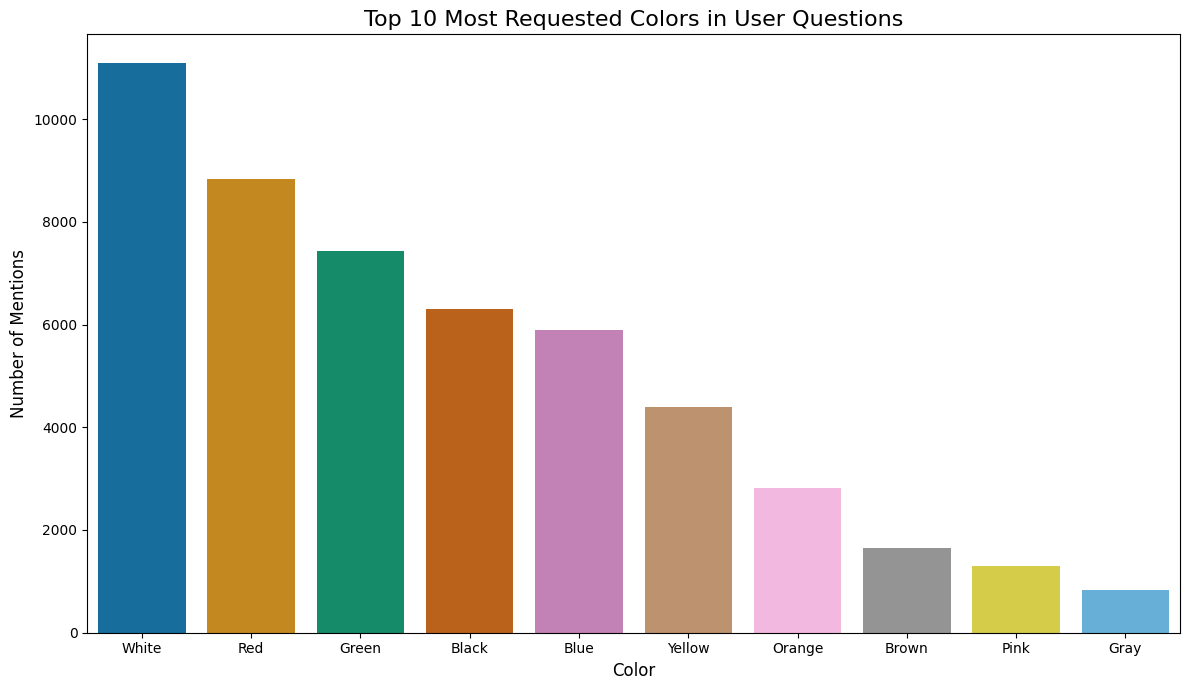


*Chart showing the top 10 requested colors saved to your Google Drive at: /content/drive/My Drive/VQA_Data/most_requested_colors_report.png*


In [ ]:
# --- 1. Load All Question Data from Google Drive ---
print("Loading all files from Google Drive...")
file_names = [
    f'{drive_path}v2_OpenEnded_mscoco_train2014_questions.json',
    f'{drive_path}v2_OpenEnded_mscoco_val2014_questions.json',
    f'{drive_path}v2_OpenEnded_mscoco_test2015_questions.json',
    f'{drive_path}v2_OpenEnded_mscoco_test-dev2015_questions.json'
]
all_questions_dfs = []
for fname in file_names:
    try:
        with open(fname, 'r') as f:
            all_questions_dfs.append(pd.DataFrame(json.load(f)['questions']))
        print(f" -> Successfully loaded: {fname.split('/')[-1]}")
    except FileNotFoundError:
        print(f"Warning: File not found: {fname}. Skipping.")
        continue
    except Exception as e:
        print(f"An error occurred while loading {fname}: {e}")

if not all_questions_dfs:
    print("\nError: No question data loaded. Halting execution.")
    exit()

all_questions_df = pd.concat(all_questions_dfs, ignore_index=True)
print(f"\nSuccessfully loaded and combined {len(all_questions_df)} questions.")

# --- 2. Analyze Most Requested Colors ---
print("\n--- Task: Generate Report for Merchandising Team (Focused on Variations) ---")
color_keywords = ['black', 'white', 'red', 'blue', 'green', 'yellow', 'brown', 'orange', 'purple', 'pink', 'gray', 'silver', 'gold']

# Find all questions that contain any of the color keywords
color_questions_mask = all_questions_df['question'].str.contains('|'.join(color_keywords), case=False, na=False)
color_questions_df = all_questions_df[color_questions_mask]

# Count the occurrences of each specific color
color_counts = Counter()
for question in color_questions_df['question']:
    # Split question into words for more accurate matching
    words_in_question = set(question.lower().replace('?', '').split())
    for color in color_keywords:
        if color in words_in_question:
            color_counts[color.capitalize()] += 1

most_requested_colors = pd.Series(color_counts).sort_values(ascending=False).head(10)

# --- 3. Generate the Focused Report ---
print("\n\n" + "="*80)
print(" VQA SYSTEM: PRODUCT VARIATION INSIGHTS REPORT")
print("="*80)
print(f"**Date:** {pd.to_datetime('today').strftime('%B %d, %Y')}")
print(f"**Focus:** Analysis of specific product variations requested by customers.")

print("\n### Most Requested Product Colors ###")

# Visualize Most Requested Colors
plt.figure(figsize=(12, 7))
sns.barplot(x=most_requested_colors.index, y=most_requested_colors.values, palette='colorblind')
plt.title('Top 10 Most Requested Colors in User Questions', fontsize=16)
plt.ylabel('Number of Mentions', fontsize=12)
plt.xlabel('Color', fontsize=12)
plt.tight_layout()

# Save the figure to your Google Drive
output_image_path = f'{drive_path}most_requested_colors_report.png'
plt.savefig(output_image_path)
plt.show()

print(f"\n*Chart showing the top 10 requested colors saved to your Google Drive at: {output_image_path}*")

**Generate a PDF Report**

In [ ]:
# --- 3. Build the PDF Report ---
print("Building PDF report...")
pdf_filename = 'VQA_Merchandising_Report.pdf'
doc = SimpleDocTemplate(pdf_filename)
styles = getSampleStyleSheet()

# Add a custom centered title style
styles.add(ParagraphStyle(name='CenterTitle', parent=styles['h1'], alignment=TA_CENTER))

# Create a list to hold the report elements ("flowables")
Story = []

# Add Title and Subtitle
Story.append(Paragraph("VQA System: Product Variation Insights Report", styles['CenterTitle']))
Story.append(Spacer(1, 0.2*inch))
date_str = f"<b>Date:</b> {pd.to_datetime('today').strftime('%B %d, %Y')}"
Story.append(Paragraph(date_str, styles['Normal']))
Story.append(Paragraph("<b>Focus:</b> Analysis of specific product variations requested by customers.", styles['Normal']))
Story.append(Spacer(1, 0.4*inch))

# Add the "Deep Dive" section
Story.append(Paragraph("Deep Dive: Most Requested Product Colors", styles['h2']))
Story.append(Paragraph("To identify immediate opportunities, we analyzed which specific colors customers mention most frequently.", styles['Normal']))
Story.append(Spacer(1, 0.2*inch))

# Add the chart image to the PDF
# Use the full path to the image saved in Google Drive
img = Image(output_image_path, width=6*inch, height=3.75*inch) # Control image size
Story.append(img)
Story.append(Spacer(1, 0.4*inch))

# Add the "Actionable Recommendations" section
Story.append(Paragraph("Actionable Recommendations for Merchandising", styles['h2']))
Story.append(Spacer(1, 0.2*inch))

# Use bullet points for recommendations
top_colors = f"{most_requested_colors.index[0]}, {most_requested_colors.index[1]}, and {most_requested_colors.index[2]}"
Story.append(Paragraph("<b>Insight: Customer demand is clearest for specific colors.</b>", styles['h3']))
Story.append(Paragraph(f"The top requested colors are <b>{top_colors}</b>.", styles['Normal']))
Story.append(Paragraph("<b>ACTION:</b>", styles['h4']))
Story.append(Paragraph("• <b>Inventory & Stocking:</b> Prioritize stocking a variety of products in these high-demand colors.", styles['Bullet']))
Story.append(Paragraph("• <b>Marketing & Campaigns:</b> Feature products in these popular colors in upcoming email campaigns, ads, and homepage banners.", styles['Bullet']))
Story.append(Paragraph("• <b>Product Development:</b> Use this data to inform color choices for new product lines.", styles['Bullet']))
Story.append(Spacer(1, 0.2*inch))

Story.append(Paragraph("<b>Insight: Improve Discoverability.</b>", styles['h3']))
Story.append(Paragraph("Customers are using basic color terms to search and ask questions.", styles['Normal']))
Story.append(Paragraph("<b>ACTION:</b>", styles['h4']))
Story.append(Paragraph("• <b>Product Naming:</b> Ensure product titles contain these exact color keywords (e.g., 'Classic Red T-Shirt').", styles['Bullet']))
Story.append(Paragraph("• <b>Improved Search:</b> Enhance website search filters to include these top 10 colors.", styles['Bullet']))

# Build the PDF
doc.build(Story)
print(f"\nSuccessfully generated report: '{pdf_filename}'")

Building PDF report...

Successfully generated report: 'VQA_Merchandising_Report.pdf'
